# Introduction

# About the data

Column | Description
-----------|-------------------
ID | Unique ID.
Gender | Gender of the customer
Ever_Married | Marital status of the customer.
Age | Age of the customer.
Graduated | Is the customer a graduate?
Profession | Profession of the customer.
Work_Experience | Work Experience in years.
Spending_Score | Spending score of the customer.
Family_Size | Number of family members for the customer (including the customer).
Var_1 | Anonymised Category for the customer.
Segmentation | Customer Segment of the customer (Target for Classification).


# Business question and evaluation

# Importing and exploring data

In [1]:
# Importing

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading data

data = pd.read_csv('data/Train.csv')
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
# Shape

data.shape

(8068, 11)

> 8068 instances and 11 features. Its a reasonable sized dataset.

In [4]:
# Check for duplicates

data.duplicated().sum()

0

We won't need the `ID` anymore. Furthermore, since we're clustering, we can also drop `Var_1` and `Segmentation`.

In [5]:
# Drop columns we won't use

df = data.drop(['ID', 'Var_1', 'Segmentation'], axis=1)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 504.4+ KB


In [7]:
df.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
dtype: int64

In [8]:
df.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


Since our objective is to characterize our clients, it's wise to don't bring any assumptions and impute the missing values. Instead, I'll only use complete data.

In [9]:
df_dropna = df.dropna()
df_dropna.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

# EDA

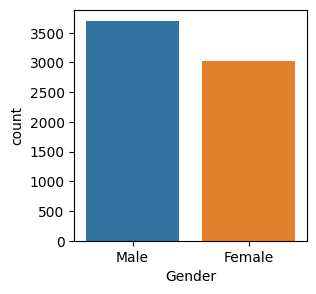

In [10]:
plt.figure(figsize=(3,3))
sns.countplot(df_dropna, x='Gender');

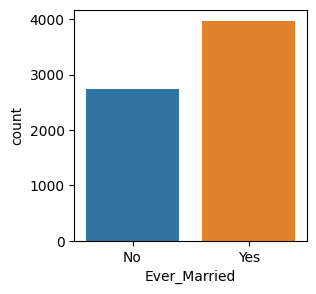

In [11]:
plt.figure(figsize=(3,3))
sns.countplot(df_dropna, x='Ever_Married');

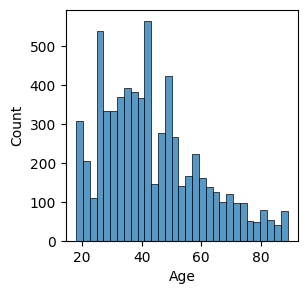

In [12]:
plt.figure(figsize=(3,3))
sns.histplot(df_dropna, x='Age');

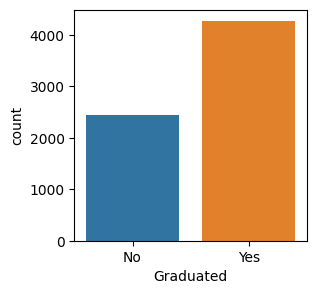

In [13]:
plt.figure(figsize=(3,3))
sns.countplot(df_dropna, x='Graduated');

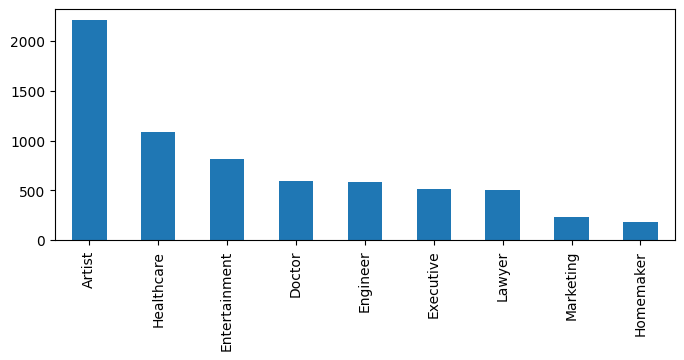

In [24]:
plt.figure(figsize=(8,3))
df_dropna['Profession'].value_counts().plot(kind='bar')
plt.show()

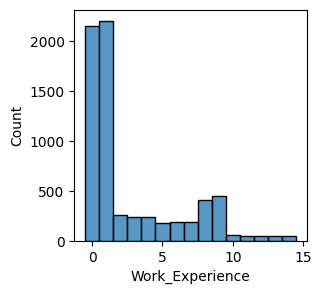

In [25]:
plt.figure(figsize=(3,3))
sns.histplot(df_dropna, x='Work_Experience', discrete=True);

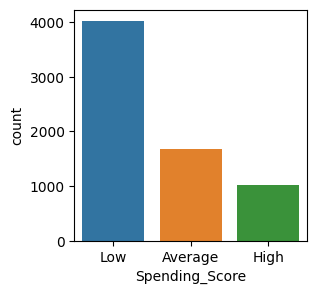

In [27]:
plt.figure(figsize=(3,3))
sns.countplot(df_dropna, x='Spending_Score', order=['Low', 'Average', 'High']);

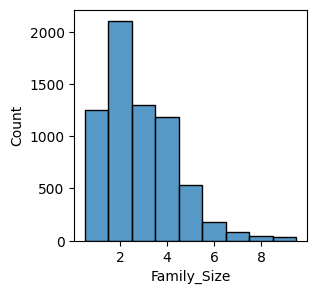

In [28]:
plt.figure(figsize=(3,3))
sns.histplot(df_dropna, x='Family_Size', discrete=True);

In [ ]:
# Correlation with numerical features

In [ ]:
# Correlation between categorical features

In [ ]:
# Correlation between categorical and numerical

# Treatment

In [29]:
def get_indexes(df, cols):
    df_cols = list(df.columns)
    indexes = []
    
    for col in cols:
        index = df_cols.index(col)
        indexes.append(index)
        
    return indexes

In [31]:
# ohe_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession']
# ord_cols = ['Spending_Score']
# num_cols = ['Age', 'Work_Experience', 'Family_Size']
# cat_cols = ohe_cols + ord_cols

# ordinal_enc = OrdinalEncoder(categories=[['Low', 'Average', 'High']])
# onehot_enc = OneHotEncoder(drop='first')
# std_scaler = StandardScaler()

# ct =  ColumnTransformer([('ordinal_enc', ordinal_enc, ord_cols),
#                          ('onehot_enc', onehot_enc, onehot_cols),
#                          ('std_scaler', std_scaler, num_cols)
#                         ])

# df_tr = ct.fit_transform(df_dropna)

In [32]:
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
num_cols = ['Age', 'Work_Experience', 'Family_Size']

ct =  ColumnTransformer([('std_scaler', StandardScaler(), num_cols)], remainder='passthrough')

df_tr = pd.DataFrame(ct.fit_transform(df_dropna), index=df_dropna.index, columns=num_cols+cat_cols)
df_tr.head()

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score
0,-1.303562,-0.478692,0.760391,Male,No,No,Healthcare,Low
2,1.421748,-0.478692,-1.20914,Female,Yes,Yes,Engineer,Low
3,1.421748,-0.772431,-0.55263,Male,Yes,Yes,Lawyer,High
5,0.755561,-0.772431,-0.55263,Male,Yes,No,Artist,Average
6,-0.697937,-0.478692,0.103881,Male,No,Yes,Healthcare,Low


# Clustering

Typically the first approach to cluster data would be use the **KMeans** algorithm, but given that we're using a dataset with mixed categorical and numerical, it is better to use **KPrototypes**. KMeans would be better suited with numerical only data, and even if we encode our features, KMeans can't handle very well binary attributes.

## Finding k by elbow method

In [33]:
# !pip install kmodes

In [34]:
# from kmodes.kprototypes import KPrototypes

# k_list = np.arange(1,9)
# inertia_list = []

# for k in k_list:
#     kprototypes = KPrototypes(n_clusters=k, max_iter=100, init='Huang', n_init=25,
#                               n_jobs=-1, random_state=42)
#     kprototypes.fit(df_tr.to_numpy(), categorical=get_indexes(df_tr, cat_cols))
#     inertia_list.append(kprototypes.cost_)

In [35]:
k_list = np.arange(1,9)

inertia_list = [27851.500000000106,
                21540.113628510728,
                16436.276660241074,
                14167.043121648308,
                12486.212367799326,
                11475.714806273721,
                10652.063586330649,
                10146.0266997184
               ]


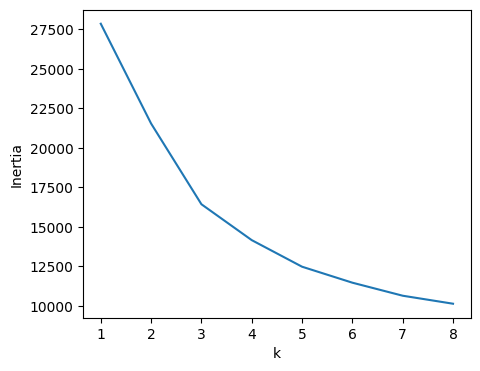

In [36]:
plt.figure(figsize=(5,4))
plt.plot(k_list, inertia_list)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

> Best result around $k = 3$ or $k = 4$.

In [37]:
# !pip install kneed

In [38]:
from kneed import KneeLocator

KneeLocator(x=k_list, y=inertia_list, S=0.1, curve='convex', direction='decreasing').elbow

3

> Again, $k=3$ sounds good. But I'll stick with $k = 4$ because it will lead to better clusters to interpret them.

# Analysis of the clusters

In [39]:
from kmodes.kprototypes import KPrototypes

k = 4
kprototypes = KPrototypes(n_clusters=k, max_iter=500, init='Huang', n_init=50,
                          n_jobs=-1, random_state=42)

kprototypes.fit(df_tr.to_numpy(), categorical=get_indexes(df_tr, cat_cols))

KPrototypes(gamma=0.5, init='Huang', max_iter=500, n_clusters=4, n_init=50,
            n_jobs=-1, random_state=42)

In [40]:
labels = kprototypes.labels_

In [48]:
df_results = df_dropna.join(pd.Series(labels, name='Label', index=df_dropna.index))

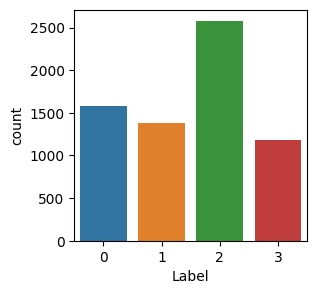

In [50]:
plt.figure(figsize=(3,3))
sns.countplot(df_results, x='Label');

> Label 2 is the biggest cluster.

In [51]:
# Analysing mean of numerical features

df_results[num_cols + ['Label']].groupby('Label').mean()

,Age,Work_Experience,Family_Size
Label,,,
0,30.106032,1.455238,4.668571
1,37.860566,8.471314,2.402324
2,42.227431,0.989539,2.265014
3,70.764557,0.974684,2.180591


In [54]:
# Table with modes for the categorical features
df_results[cat_cols + ['Label']].groupby('Label').agg(lambda x: pd.Series.mode(x))

,Gender,Ever_Married,Graduated,Profession,Spending_Score
Label,,,,,
0,Male,No,No,Healthcare,Low
1,Female,Yes,Yes,Artist,Low
2,Male,Yes,Yes,Artist,Low
3,Male,Yes,Yes,Lawyer,High


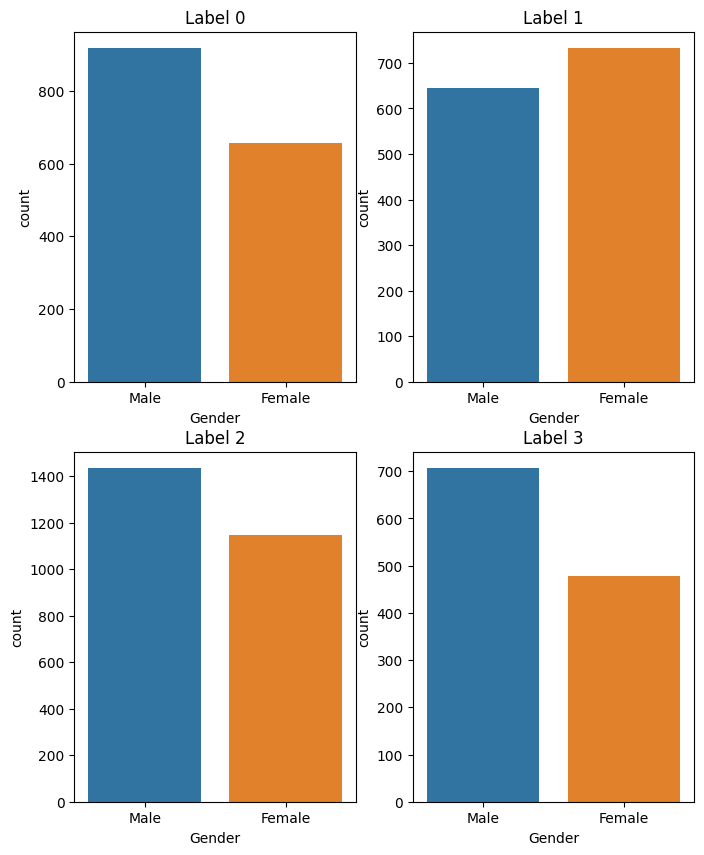

In [59]:
plt.figure(figsize=(9,10))

plt.subplot(2,2,1)
sns.countplot(df_results[df_results['Label'] == 0], x='Gender', order=['Male', 'Female'])
plt.title('Label 0')

plt.subplot(2,2,2)
sns.countplot(df_results[df_results['Label'] == 1], x='Gender', order=['Male', 'Female'])
plt.title('Label 1')

plt.subplot(2,2,3)
sns.countplot(df_results[df_results['Label'] == 2], x='Gender', order=['Male', 'Female'])
plt.title('Label 2')

plt.subplot(2,2,4)
sns.countplot(df_results[df_results['Label'] == 3], x='Gender', order=['Male', 'Female'])
plt.title('Label 3')

plt.show()

> Somewhat simillar distribution. Label 1 is slightly more feminine.

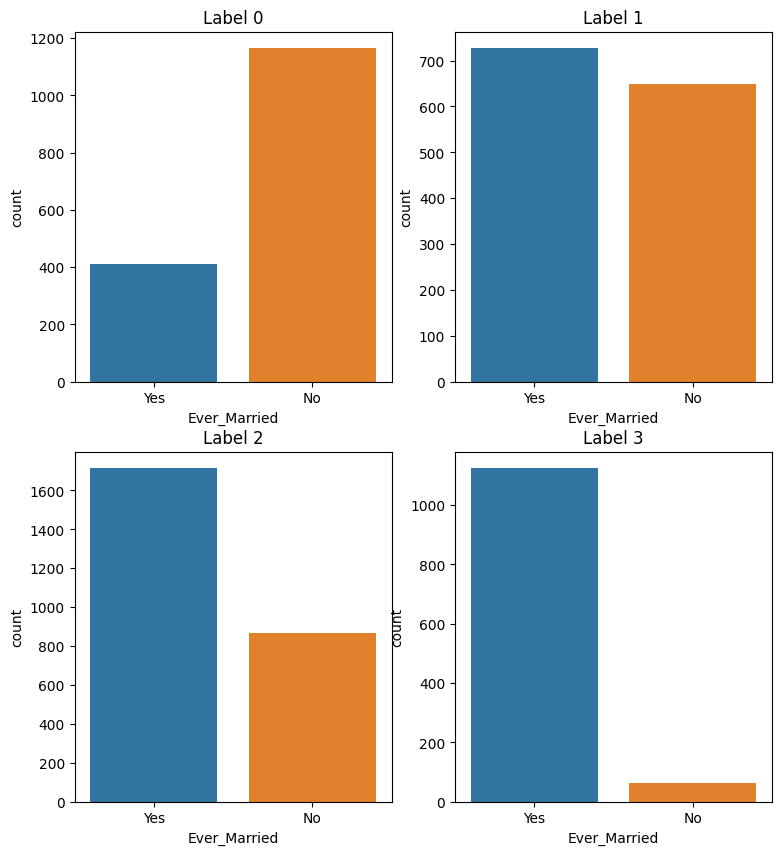

In [73]:
plt.figure(figsize=(9,10))

plt.subplot(2,2,1)
sns.countplot(df_results[df_results['Label'] == 0], x='Ever_Married', order=['Yes', 'No'])
plt.title('Label 0')

plt.subplot(2,2,2)
sns.countplot(df_results[df_results['Label'] == 1], x='Ever_Married', order=['Yes', 'No'])
plt.title('Label 1')

plt.subplot(2,2,3)
sns.countplot(df_results[df_results['Label'] == 2], x='Ever_Married', order=['Yes', 'No'])
plt.title('Label 2')

plt.subplot(2,2,4)
sns.countplot(df_results[df_results['Label'] == 3], x='Ever_Married', order=['Yes', 'No'])
plt.title('Label 3')

plt.show()

> Cluster 3 is noteworthy: unlike the other clusters it contais mostly never-married clients.

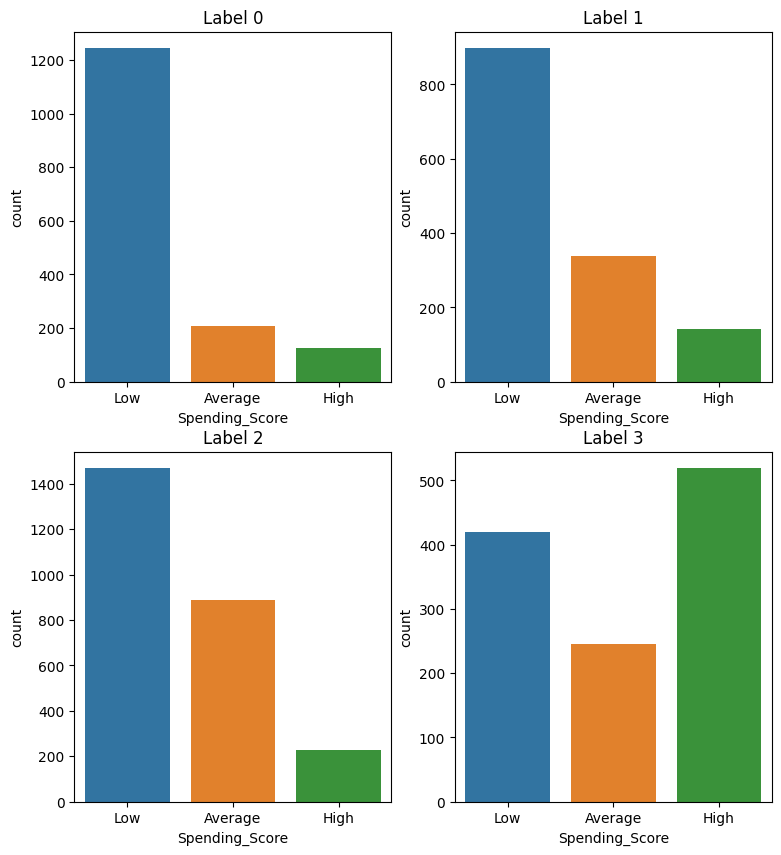

In [63]:
plt.figure(figsize=(9,10))

plt.subplot(2,2,1)
sns.countplot(df_results[df_results['Label'] == 0], x='Spending_Score', order=['Low', 'Average', 'High'])
plt.title('Label 0')

plt.subplot(2,2,2)
sns.countplot(df_results[df_results['Label'] == 1], x='Spending_Score', order=['Low', 'Average', 'High'])
plt.title('Label 1')

plt.subplot(2,2,3)
sns.countplot(df_results[df_results['Label'] == 2], x='Spending_Score', order=['Low', 'Average', 'High'])
plt.title('Label 2')

plt.subplot(2,2,4)
sns.countplot(df_results[df_results['Label'] == 3], x='Spending_Score', order=['Low', 'Average', 'High'])
plt.title('Label 3')

plt.show()

> Cluster 0 is an interesting target: it contains a lot of clients that spend little. In contrast, cluster 3 contains majoritary clients that already spend a higher amount.

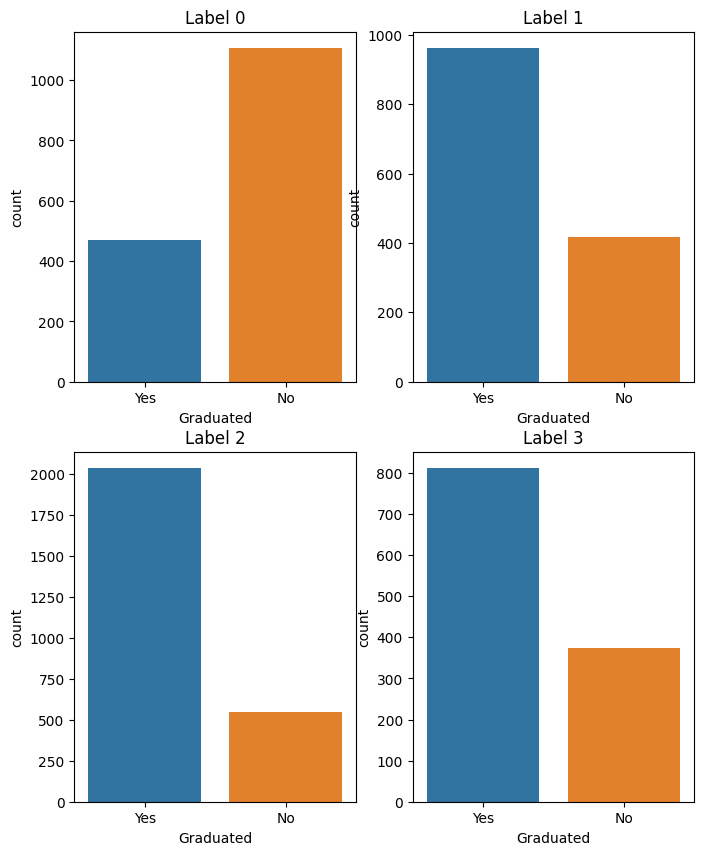

In [74]:
plt.figure(figsize=(8,10))

plt.subplot(2,2,1)
sns.countplot(df_results[df_results['Label'] == 0], x='Graduated', order=['Yes', 'No'])
plt.title('Label 0')

plt.subplot(2,2,2)
sns.countplot(df_results[df_results['Label'] == 1], x='Graduated', order=['Yes', 'No'])
plt.title('Label 1')

plt.subplot(2,2,3)
sns.countplot(df_results[df_results['Label'] == 2], x='Graduated', order=['Yes', 'No'])
plt.title('Label 2')

plt.subplot(2,2,4)
sns.countplot(df_results[df_results['Label'] == 3], x='Graduated', order=['Yes', 'No'])
plt.title('Label 3')

plt.show()

> Most of the Cluster 0 are ungraduated clients. A large percentage of Cluster 2 is graduated.

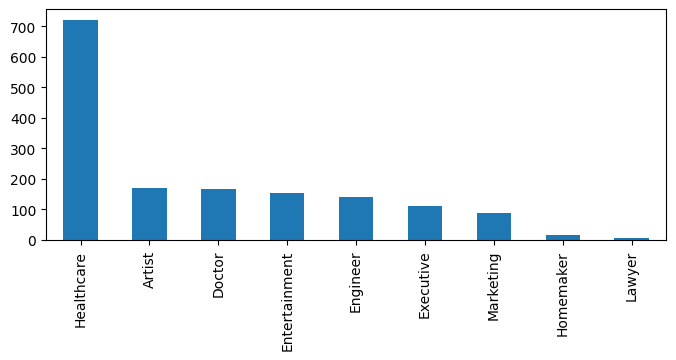

In [87]:
plt.figure(figsize=(8,3))
df_results[df_results['Label'] == 0]['Profession'].value_counts().plot(kind='bar')
plt.show()

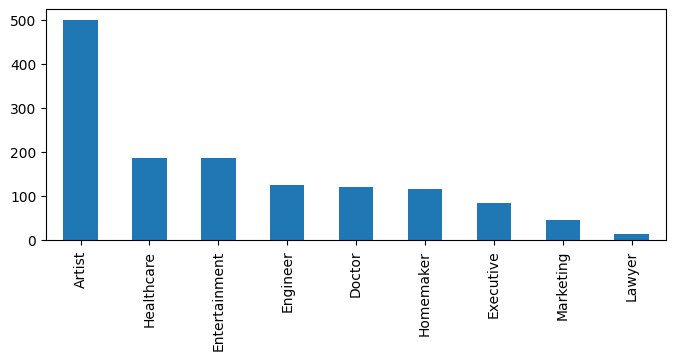

In [88]:
plt.figure(figsize=(8,3))
df_results[df_results['Label'] == 1]['Profession'].value_counts().plot(kind='bar')
plt.show()

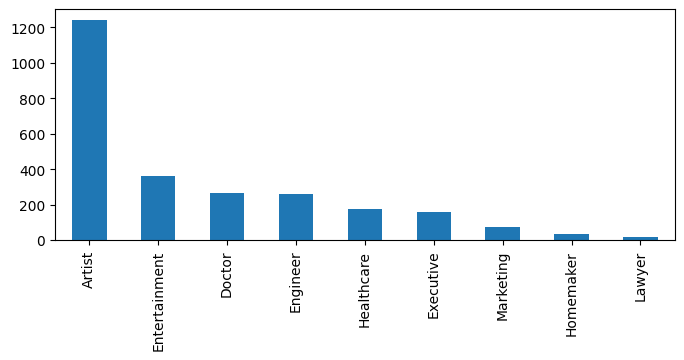

In [89]:
plt.figure(figsize=(8,3))
df_results[df_results['Label'] == 2]['Profession'].value_counts().plot(kind='bar')
plt.show()

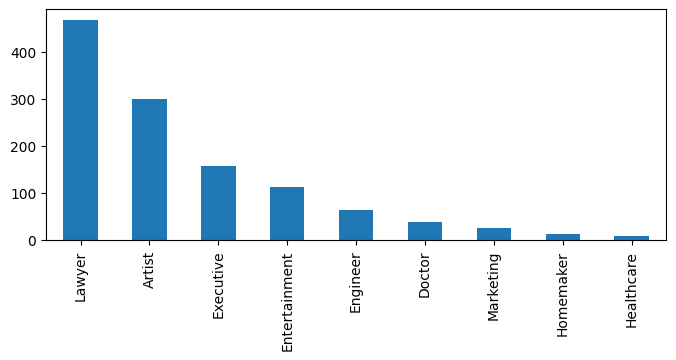

In [91]:
plt.figure(figsize=(8,3))
df_results[df_results['Label'] == 3]['Profession'].value_counts().plot(kind='bar')
plt.show()

> Cluster 0 is formed mostly by heathcare workers (which is the second most prevalent profession)

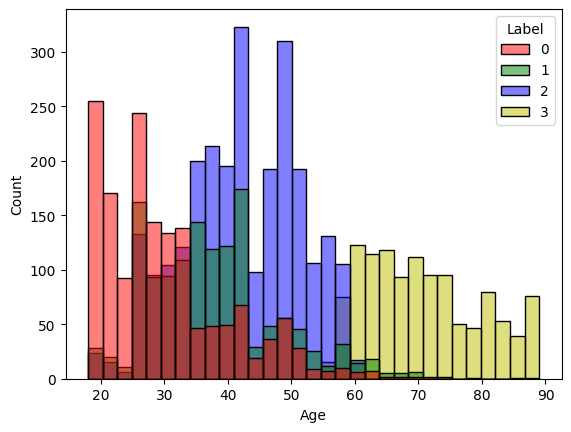

In [69]:
sns.histplot(df_results, x='Age', hue='Label', palette=['r','g','b','y']);

> Our clusters are coincidently in age order. This can be used to target products by age.

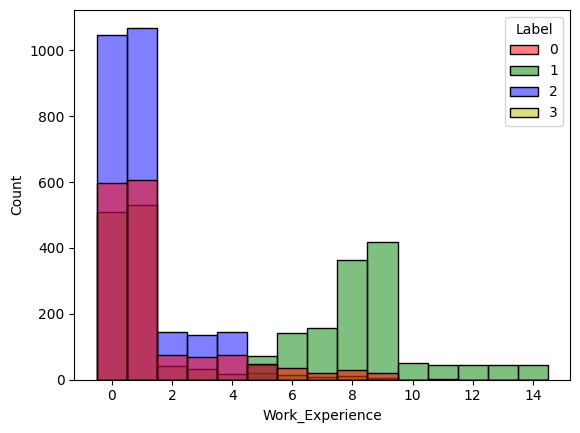

In [70]:
sns.histplot(df_results, x='Work_Experience', hue='Label', palette=['r','g','b','y'], discrete=True);

> People with low work experience are most present in Cluster 2. Cluster 1 contains experienced workers.

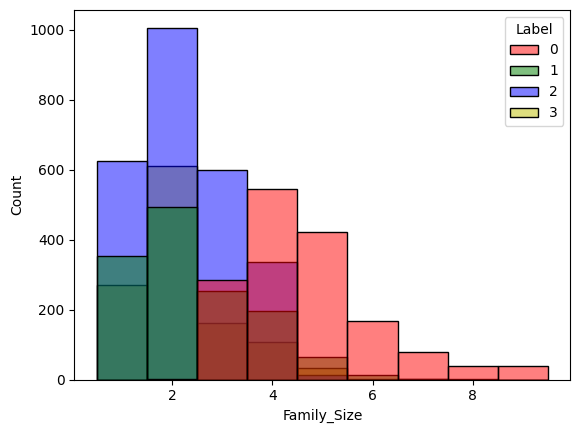

In [71]:
sns.histplot(df_results, x='Family_Size', hue='Label', palette=['r','g','b','y'], discrete=True);

> Many clients of cluster 0 contains a considerably family size.

# Conclusions